<a href="https://colab.research.google.com/github/songoku4/PlantDiseaseClassification/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/plant-disease-dataset/Dataset

/content/drive/MyDrive/plant-disease-dataset/Dataset


In [22]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [24]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/plant-disease-dataset/Dataset/train'
valid_path = '/content/drive/MyDrive/plant-disease-dataset/Dataset/test'

In [25]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
for layer in inception.layers:
    layer.trainable = False

In [27]:
folders = glob('/content/drive/MyDrive/plant-disease-dataset/Dataset/train/*')

In [28]:
x = Flatten()(inception.output)


In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [30]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [31]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/plant-disease-dataset/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1953 images belonging to 4 classes.


In [34]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/plant-disease-dataset/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [36]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
123/123 [==============================] - 51s 410ms/step - loss: 1.1144 - accuracy: 0.8858 - val_loss: 0.1732 - val_accuracy: 0.8889
Epoch 2/20
123/123 [==============================] - 50s 407ms/step - loss: 0.8312 - accuracy: 0.9099 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3/20
123/123 [==============================] - 50s 406ms/step - loss: 1.0677 - accuracy: 0.9068 - val_loss: 1.7857 - val_accuracy: 0.7778
Epoch 4/20
123/123 [==============================] - 50s 406ms/step - loss: 0.9845 - accuracy: 0.9130 - val_loss: 1.9196 - val_accuracy: 0.7222
Epoch 5/20
123/123 [==============================] - 50s 406ms/step - loss: 0.7892 - accuracy: 0.9334 - val_loss: 0.2523 - val_accuracy: 0.9444
Epoch 6/20
123/123 [==============================] - 50s 405ms/step - loss: 0.7395 - accuracy: 0.9386 - val_loss: 1.1590e-06 - val_accuracy: 1.0000
Epoch 7/20
123/123 [==============================] - 50s 406ms/step - loss: 0.4471 - accuracy: 0.9467 - val_loss: 0.2132 - va

In [37]:
import matplotlib.pyplot as plt

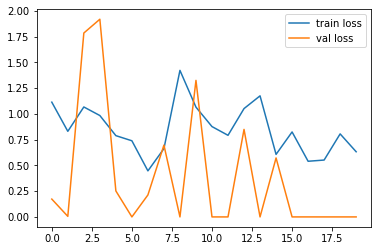

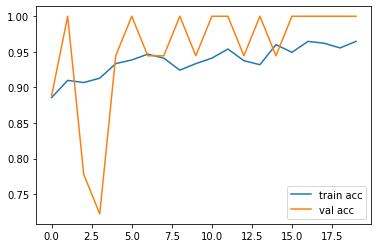

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')